Instalações e importações:

In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install tk

import os
import tkinter as tk
from tkinter import messagebox, filedialog
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Abrir o arquivo de dados .csv:

In [7]:
# Função para selecionar o arquivo CSV
def selecionar_arquivo():
    root = tk.Tk()
    root.withdraw()  # Esconde a janela principal
    caminho = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    root.destroy()  # Destroi a janela principal após a seleção do arquivo
    return caminho

# Selecionar o arquivo CSV
caminho = selecionar_arquivo()

# Carregar os dados do arquivo CSV
df = pd.read_csv(caminho, sep=';')
# Reordenar o DataFrame em ordem decrescente com base na segunda coluna
df = df.sort_values(by=df.columns[1], ascending=False)
df

,Heavy Metals,Number of studies
0,Ferro,57
1,Cobre,14
2,Zinco,14
3,Cobalto,7
4,Manganês,5
5,Míquel,4
6,Cádmio,2


Gerar o Gráfico em 600 dpi:

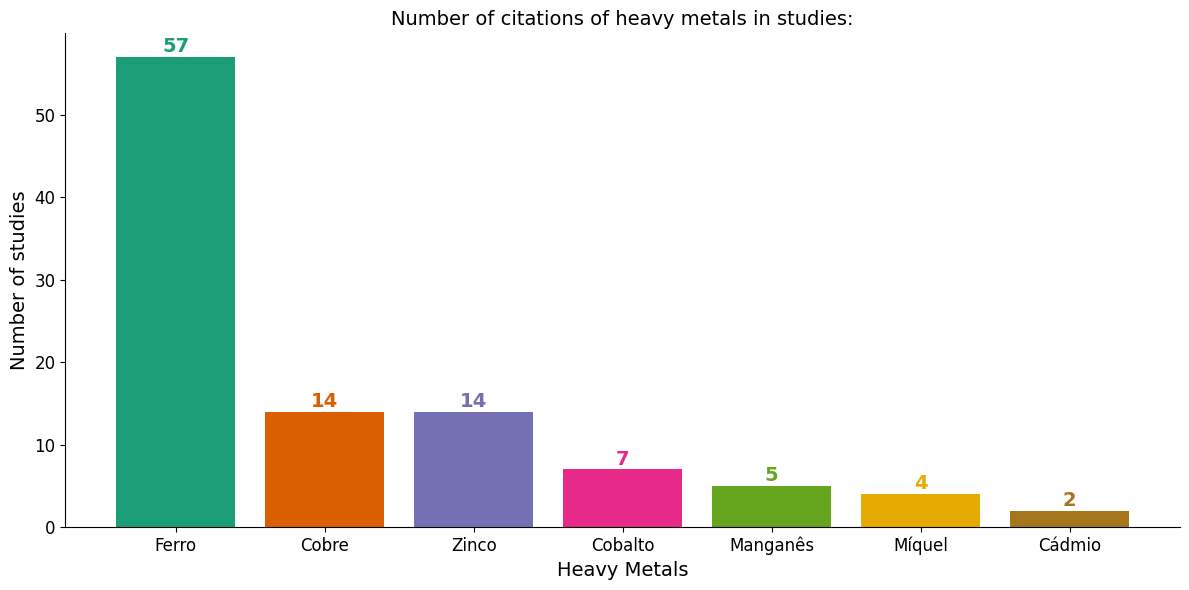

In [8]:
# Supondo que df já esteja definido
x_name = df.columns[0]
y_name = df.columns[1]
x = df.iloc[:, 0].astype(str)
y = df.iloc[:, 1].astype(int)
# y = df.iloc[:, 1].astype(float)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, y, color=sns.color_palette('Dark2'))
ax.set_xlabel(f"{x_name}", fontsize=14)
ax.set_ylabel(f"{y_name}", fontsize=14)

# Ajustar o tamanho da fonte dos valores nos eixos x e y
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remover as bordas superiores e direitas
ax.spines[['top', 'right']].set_visible(False)

# Adicionar valores numéricos acima de cada barra
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{bar.get_height()}',
            va='bottom', ha='center', color=bar.get_facecolor(), weight='bold', fontsize=14)
    
ax.set_title("Number of citations of heavy metals in studies:", fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

plt.savefig("grafico_svg.svg", dpi=600)
plt.savefig("grafico_png.png", dpi=600)
plt.show()

root = tk.Tk()
root.withdraw()  # Hide the root window
messagebox.showinfo("Sucesso", "Gráficos Gerados com Sucesso!")
root.destroy()  # Destroy the root window after the message is shown